## COLLCT DATA OR IMPORT DATA

In [363]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

sns.set(rc={'figure.figsize':(12,10)})#set the figsize

titanic_data=pd.read_csv('titanic_data.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [364]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [365]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [366]:
print('number of passenger: ' + str(len(titanic_data.index)))

number of passenger: 891


## ANALYZE DATA

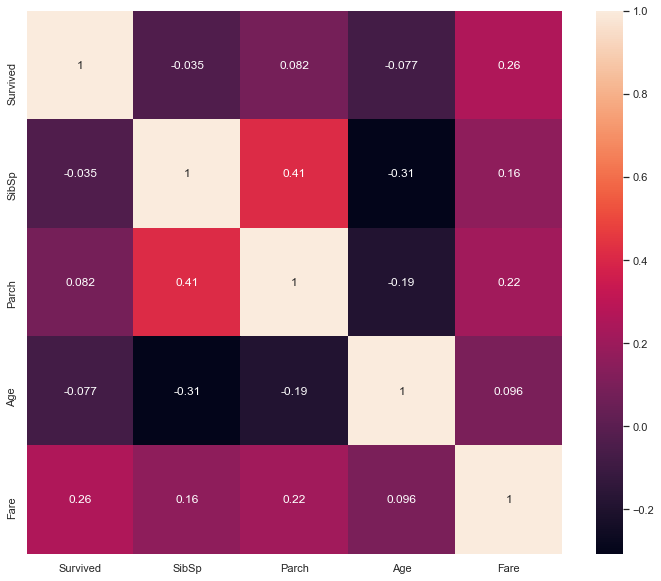

In [367]:
hetmap=sns.heatmap(titanic_data[['Survived','SibSp','Parch','Age','Fare']].corr(),annot=True)

C:\Users\Shemonti\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Shemonti\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


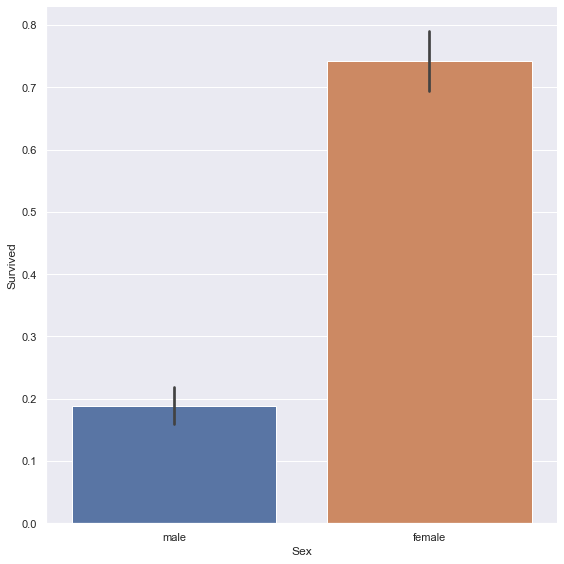

In [368]:
bargrph_sibsp=sns.factorplot(x='Sex',y='Survived',data=titanic_data,kind='bar',size=8)

C:\Users\Shemonti\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


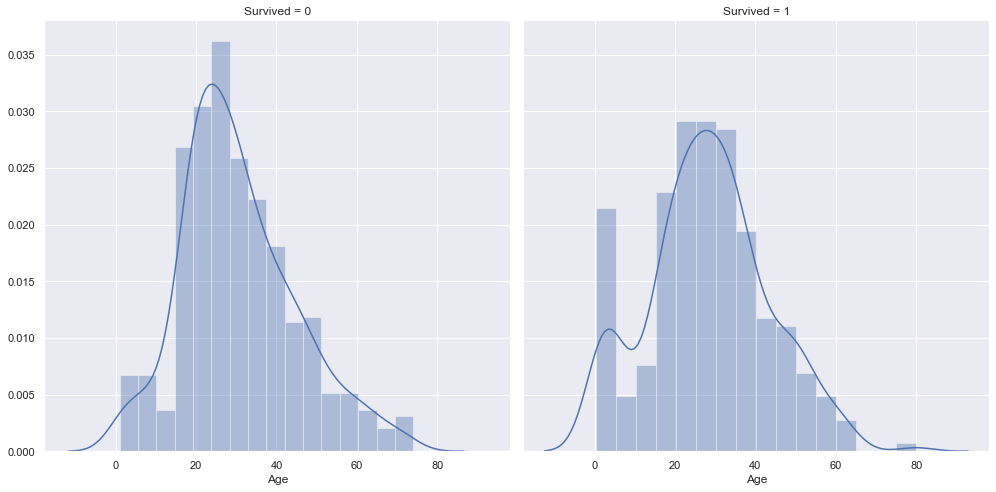

In [369]:
age_visual=sns.FacetGrid(titanic_data,col='Survived',size=7)
age_visual=age_visual.map(sns.distplot,'Age')

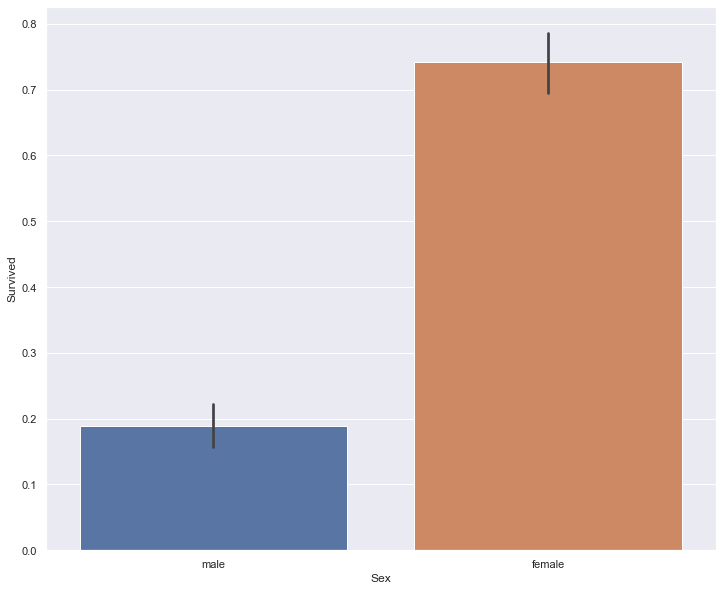

In [370]:
sns.barplot(x='Sex',y='Survived',data=titanic_data)

C:\Users\Shemonti\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Shemonti\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


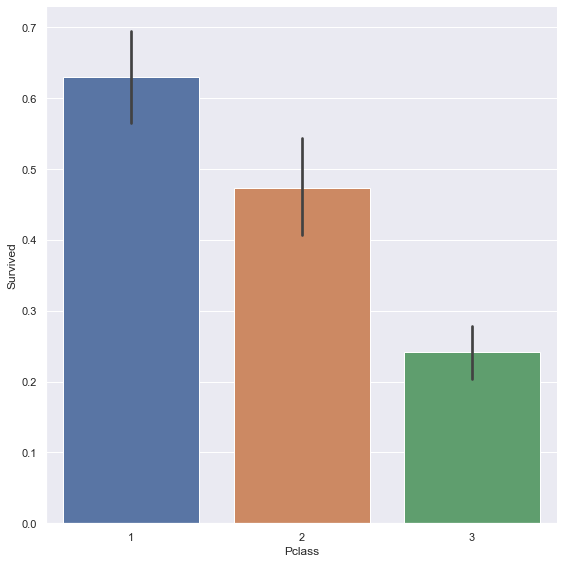

In [371]:
Pclass=sns.factorplot(x='Pclass',y='Survived',data=titanic_data,kind='bar',size=8)

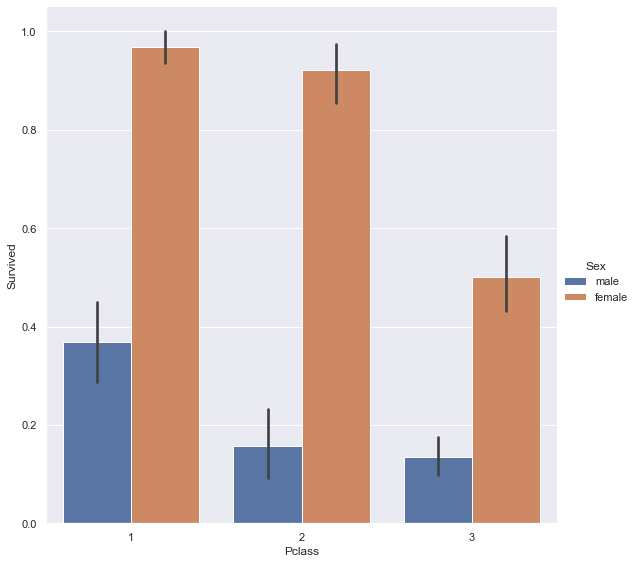

In [372]:
Pclass1=sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=titanic_data,kind='bar',size=8)

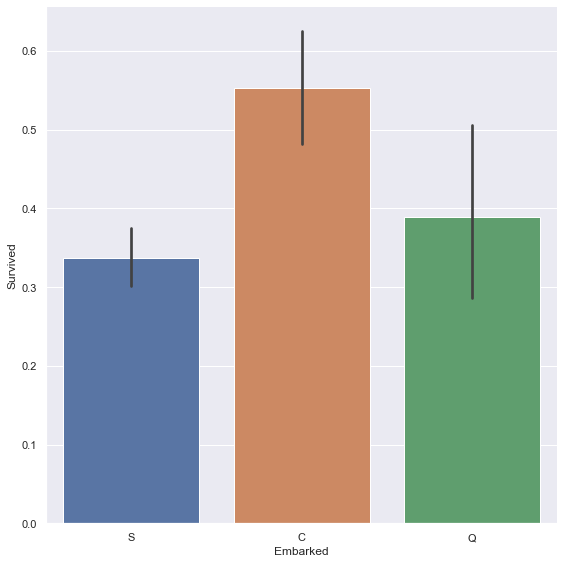

In [373]:
embrk=sns.factorplot(x='Embarked',y='Survived',data=titanic_data,kind='bar',size=8)

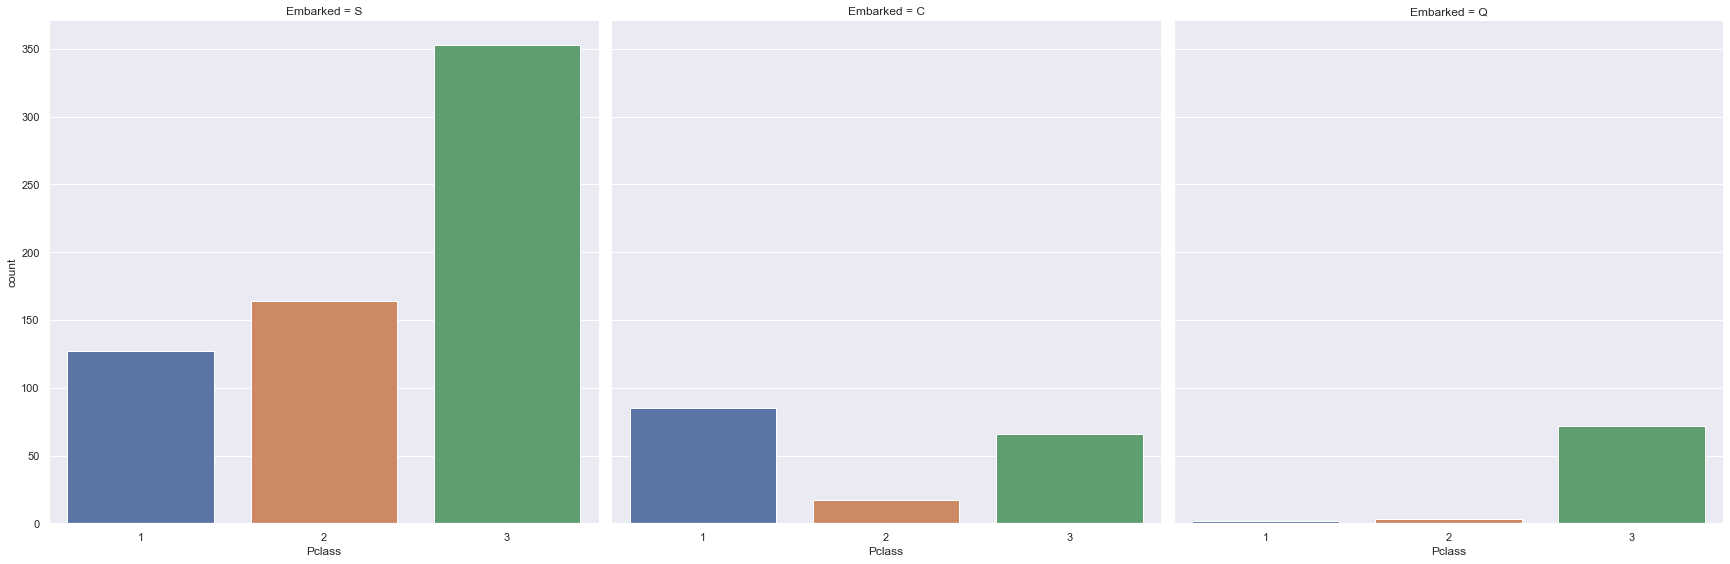

In [374]:
g=sns.factorplot(x='Pclass',col='Embarked',data=titanic_data,size=8,kind='count')

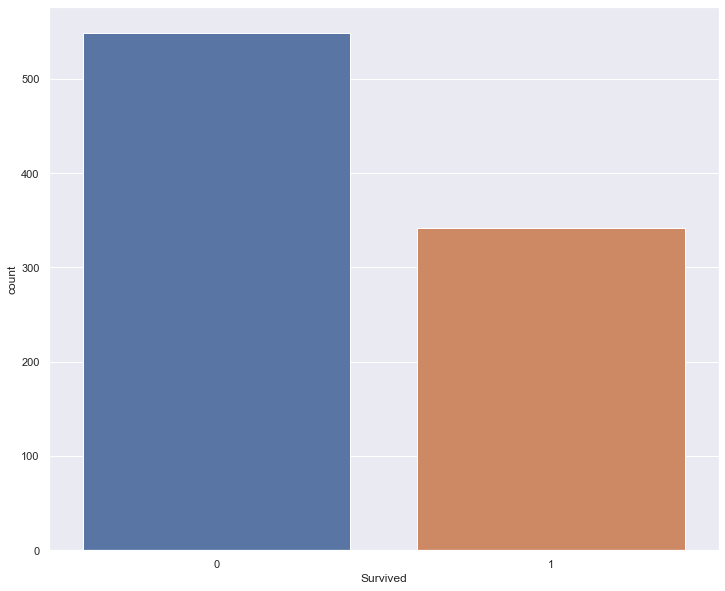

In [375]:
sns.countplot(x="Survived", data=titanic_data)

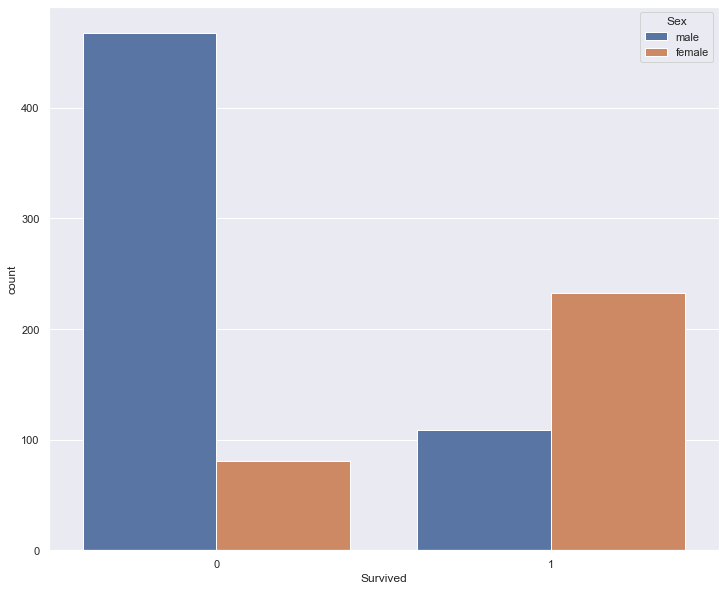

In [376]:
sns.countplot(x="Survived",hue="Sex", data=titanic_data)

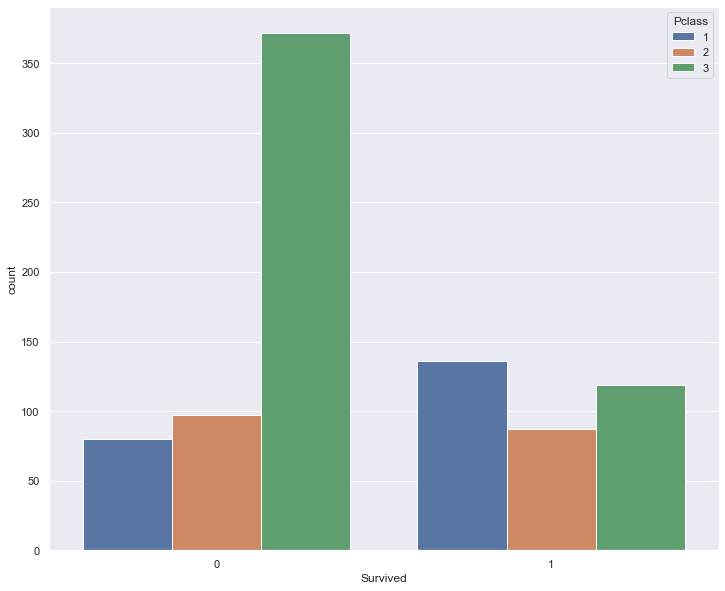

In [377]:
sns.countplot(x="Survived",hue="Pclass", data=titanic_data)

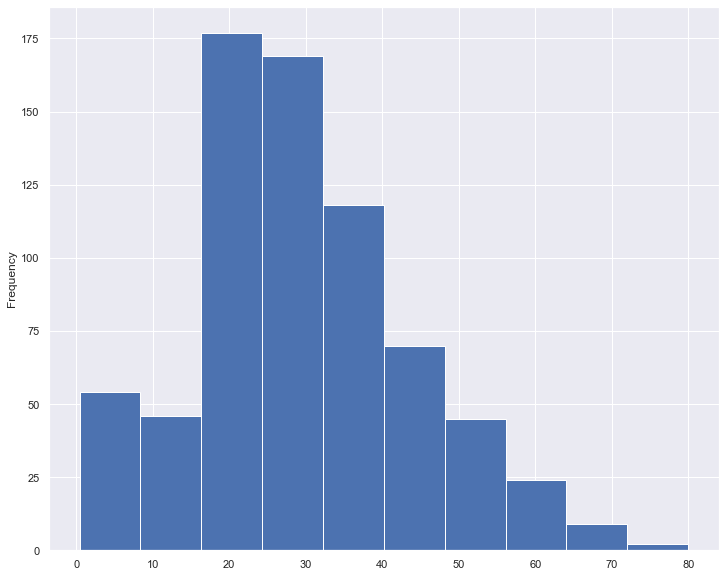

In [378]:
titanic_data["Age"].plot.hist()

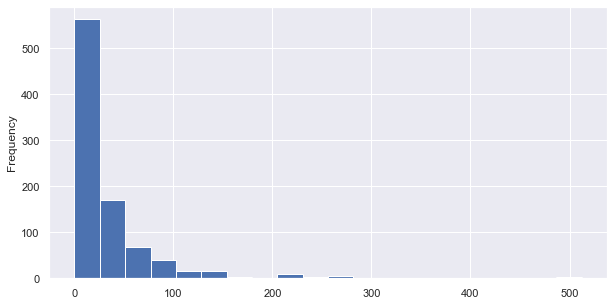

In [379]:
titanic_data["Fare"].plot.hist(bins=20,figsize=(10,5))

In [380]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


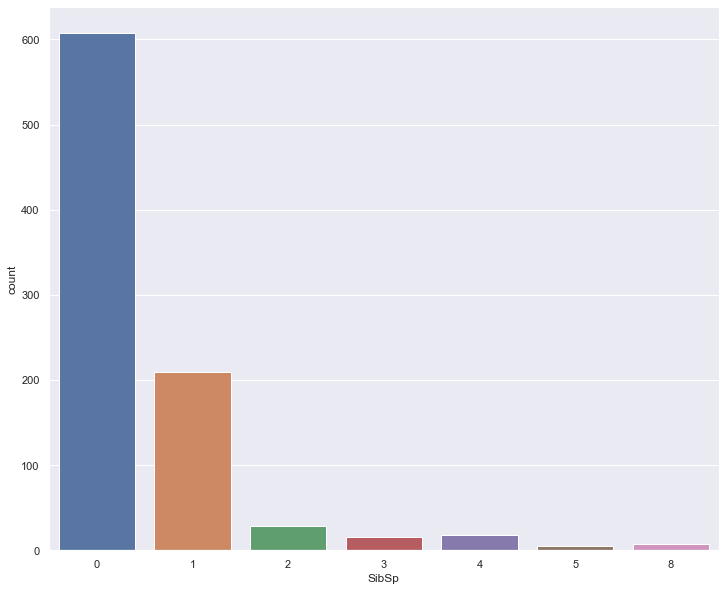

In [381]:
sns.countplot(x="SibSp", data=titanic_data)

## data wranging

In [382]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [383]:
mean=titanic_data["Age"].mean()
std=titanic_data["Age"].std()

is_null=titanic_data["Age"].isnull().sum()
randomage=np.random.randint(mean -std,mean + std,size=is_null)

In [384]:
age_slice=titanic_data["Age"].copy()

In [385]:
age_slice[np.isnan(age_slice)]=randomage

In [386]:
titanic_data["Age"]=age_slice

In [387]:
titanic_data["Age"].isnull().sum()

0

In [388]:
titanic_data["Embarked"]=titanic_data["Embarked"].fillna("S")

In [389]:
titanic_data["Embarked"].isnull().sum()

0

In [390]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [391]:
genders={'male': 0 , 'female': 1}
titanic_data['Sex']=titanic_data['Sex'].map(genders)

In [392]:
ports={'S':0,'C':1,'Q':2}
titanic_data['Embarked']=titanic_data['Embarked'].map(ports)

In [393]:
titanic_data.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## train data

In [450]:
x=titanic_data.drop("Survived",axis=1)
y=titanic_data["Survived"]

In [451]:
from sklearn.model_selection import train_test_split

In [452]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

## Scaling

In [412]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [453]:
logreg=LogisticRegression()
svc_classifier=SVC()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier(5)
rf_classifier=RandomForestClassifier(n_estimators=1000)

In [454]:
logreg.fit(x_train,y_train)
svc_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)

C:\Users\Shemonti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(n_estimators=1000)

In [455]:
logreg_ypred=logreg.predict(x_test)
svc_classifier_ypred=svc_classifier.predict(x_test)
dt_classifier_ypred=dt_classifier.predict(x_test)
knn_classifier_ypred=knn_classifier.predict(x_test)
rf_classifier_ypred=rf_classifier.predict(x_test)

In [456]:
from sklearn.metrics import confusion_matrix

In [457]:
from sklearn.metrics import accuracy_score

In [458]:
confusion_matrix(y_test,logreg_ypred)
# confusion_matrix(y_test,svc_classifier_ypred)
# confusion_matrix(y_test,dt_classifier_ypred)
# confusion_matrix(y_test,knn_classifier_ypred)
# confusion_matrix(y_test,rf_classifier_ypred)

array([[142,  26],
       [ 28,  72]], dtype=int64)

In [459]:
confusion_matrix(y_test,svc_classifier_ypred)

array([[160,   8],
       [ 68,  32]], dtype=int64)

In [460]:
confusion_matrix(y_test,dt_classifier_ypred)

array([[141,  27],
       [ 35,  65]], dtype=int64)

In [461]:
confusion_matrix(y_test,knn_classifier_ypred)

array([[136,  32],
       [ 44,  56]], dtype=int64)

In [462]:
confusion_matrix(y_test,rf_classifier_ypred)

array([[147,  21],
       [ 29,  71]], dtype=int64)

In [463]:
from sklearn.metrics import accuracy_score

In [464]:
logreg_acc=accuracy_score(y_test,logreg_ypred)
svc_classifier_acc=accuracy_score(y_test,svc_classifier_ypred)
dt_classifier_acc=accuracy_score(y_test,dt_classifier_ypred)
knn_classifier_acc=accuracy_score(y_test,knn_classifier_ypred)
rf_classifier_acc=accuracy_score(y_test,rf_classifier_ypred)


In [410]:
#kn=7 without scalling
print("Logistic Regression :",round(logreg_acc*100,2))
print("SVC Classifier :",round(svc_classifier_acc*100,2))
print("Decision Tree Claassification :",round(dt_classifier_acc*100,2))
print("Kneighbors Classifiction :",round(knn_classifier_acc*100,2))
print("Rainforest Clssification :",round(rf_classifier_acc*100,2))

Logistic Regression : 79.85
SVC Classifier : 71.64
Decision Tree Claassification : 77.24
Kneighbors Classifiction : 70.9
Rainforest Clssification : 81.34


In [437]:
#when kn=5 with scaling
print("Logistic Regression :",round(logreg_acc*100,2))
print("SVC Classifier :",round(svc_classifier_acc*100,2))
print("Decision Tree Claassification :",round(dt_classifier_acc*100,2))
print("Kneighbors Classifiction :",round(knn_classifier_acc*100,2))
print("Rainforest Clssification :",round(rf_classifier_acc*100,2))

Logistic Regression : 80.22
SVC Classifier : 81.72
Decision Tree Claassification : 77.61
Kneighbors Classifiction : 81.34
Rainforest Clssification : 82.09


In [449]:
#kn=7 withscling
print("Logistic Regression :",round(logreg_acc*100,2))
print("SVC Classifier :",round(svc_classifier_acc*100,2))
print("Decision Tree Claassification :",round(dt_classifier_acc*100,2))
print("Kneighbors Classifiction :",round(knn_classifier_acc*100,2))
print("Rainforest Clssification :",round(rf_classifier_acc*100,2))

Logistic Regression : 80.22
SVC Classifier : 81.72
Decision Tree Claassification : 78.36
Kneighbors Classifiction : 81.34
Rainforest Clssification : 81.72


In [465]:
#kn=5 without scaling
print("Logistic Regression :",round(logreg_acc*100,2))
print("SVC Classifier :",round(svc_classifier_acc*100,2))
print("Decision Tree Claassification :",round(dt_classifier_acc*100,2))
print("Kneighbors Classifiction :",round(knn_classifier_acc*100,2))
print("Rainforest Clssification :",round(rf_classifier_acc*100,2))

Logistic Regression : 79.85
SVC Classifier : 71.64
Decision Tree Claassification : 76.87
Kneighbors Classifiction : 71.64
Rainforest Clssification : 81.34
